In [17]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [19]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [20]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [21]:
# import nltk
# nltk.download()


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.metrics import mean_squared_error
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [23]:
df=pd.read_csv('C:/Users/DineshMohan/Desktop/IHR.csv')
df

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,...,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
0,7,0,STATE NCT OF DELHI,0,0,0,Total,828980,708129,120851,...,117709,61009,44743,16266,1969,1494,475,59040,43249,15791
1,7,0,STATE NCT OF DELHI,1,0,0,"Crop and animal production, hunting and relate...",1484,1271,213,...,162,224,150,74,23,13,10,201,137,64
2,7,0,STATE NCT OF DELHI,1,11,0,Growing of nonperennial crops,169,151,18,...,16,92,65,27,14,12,2,78,53,25
3,7,0,STATE NCT OF DELHI,1,11,111,"Growing of cereals (except rice), leguminous c...",83,81,2,...,0,37,27,10,8,6,2,29,21,8
4,7,0,STATE NCT OF DELHI,1,11,112,Growing of rice,9,9,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195140,19,345,District Purba Medinipur,99,990,9900,Activities of extraterritorial organizations a...,18,12,6,...,6,0,0,0,0,0,0,0,0,0
195141,19,345,District Purba Medinipur,99,991,0,Blank,8244,5866,2378,...,876,25591,8488,17103,22057,7272,14785,3534,1216,2318
195142,19,345,District Purba Medinipur,99,991,9910,Blank,8244,5866,2378,...,876,25591,8488,17103,22057,7272,14785,3534,1216,2318
195143,19,345,District Purba Medinipur,99,992,0,Incomplete description Wrongly Classifed,8324,4604,3720,...,932,14872,3352,11520,13204,2934,10270,1668,418,1250


In [24]:
df['India/States'].nunique()


491

In [25]:
dummy_df = pd.get_dummies(df['India/States'], prefix='dummies', dtype=int)
dummy_df

,dummies_District Agra,dummies_District Ahmadabad,dummies_District Ahmadnagar,dummies_District Aizawl,dummies_District Ajmer,dummies_District Akola,dummies_District Alappuzha,dummies_District Aligarh,dummies_District Allahabad,dummies_District Almora,...,dummies_STATE NCT OF DELHI,dummies_STATE ODISHA,dummies_STATE PUDUCHERRY,dummies_STATE RAJASTHAN,dummies_STATE SIKKIM,dummies_STATE TAMIL NADU,dummies_STATE TRIPURA,dummies_STATE UTTAR PRADESH,dummies_STATE UTTARAKHAND,dummies_STATE WEST BENGAL
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195140,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195141,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195142,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195143,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df1 = pd.concat([df,dummy_df],ignore_index=True,axis=1)
df1

,0,1,2,3,4,5,6,7,8,9,...,506,507,508,509,510,511,512,513,514,515
0,7,0,STATE NCT OF DELHI,0,0,0,Total,828980,708129,120851,...,1,0,0,0,0,0,0,0,0,0
1,7,0,STATE NCT OF DELHI,1,0,0,"Crop and animal production, hunting and relate...",1484,1271,213,...,1,0,0,0,0,0,0,0,0,0
2,7,0,STATE NCT OF DELHI,1,11,0,Growing of nonperennial crops,169,151,18,...,1,0,0,0,0,0,0,0,0,0
3,7,0,STATE NCT OF DELHI,1,11,111,"Growing of cereals (except rice), leguminous c...",83,81,2,...,1,0,0,0,0,0,0,0,0,0
4,7,0,STATE NCT OF DELHI,1,11,112,Growing of rice,9,9,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195140,19,345,District Purba Medinipur,99,990,9900,Activities of extraterritorial organizations a...,18,12,6,...,0,0,0,0,0,0,0,0,0,0
195141,19,345,District Purba Medinipur,99,991,0,Blank,8244,5866,2378,...,0,0,0,0,0,0,0,0,0,0
195142,19,345,District Purba Medinipur,99,991,9910,Blank,8244,5866,2378,...,0,0,0,0,0,0,0,0,0,0
195143,19,345,District Purba Medinipur,99,992,0,Incomplete description Wrongly Classifed,8324,4604,3720,...,0,0,0,0,0,0,0,0,0,0


In [27]:
# df['Main Workers - Total - Persons']
for i in df:
    print(i) 

State Code
District Code
India/States
Division
Group
Class
NIC Name
Main Workers - Total -  Persons
Main Workers - Total - Males
Main Workers - Total - Females
Main Workers - Rural -  Persons
Main Workers - Rural - Males
Main Workers - Rural - Females
Main Workers - Urban -  Persons
Main Workers - Urban - Males
Main Workers - Urban - Females
Marginal Workers - Total -  Persons
Marginal Workers - Total - Males
Marginal Workers - Total - Females
Marginal Workers - Rural -  Persons
Marginal Workers - Rural - Males
Marginal Workers - Rural - Females
Marginal Workers - Urban -  Persons
Marginal Workers - Urban - Males
Marginal Workers - Urban - Females


In [28]:
df['NIC Name']

0                                                     Total
1         Crop and animal production, hunting and relate...
2                             Growing of nonperennial crops
3         Growing of cereals (except rice), leguminous c...
4                                           Growing of rice
                                ...                        
195140    Activities of extraterritorial organizations a...
195141                                                Blank
195142                                                Blank
195143             Incomplete description Wrongly Classifed
195144             Incomplete description Wrongly Classifed
Name: NIC Name, Length: 195145, dtype: object

In [29]:
df['Main Workers - Total -  Persons']

0         828980
1           1484
2            169
3             83
4              9
           ...  
195140        18
195141      8244
195142      8244
195143      8324
195144      8324
Name: Main Workers - Total -  Persons, Length: 195145, dtype: int64

In [30]:
# df['State Code']
# dat=list(df['State Code'])
# dat

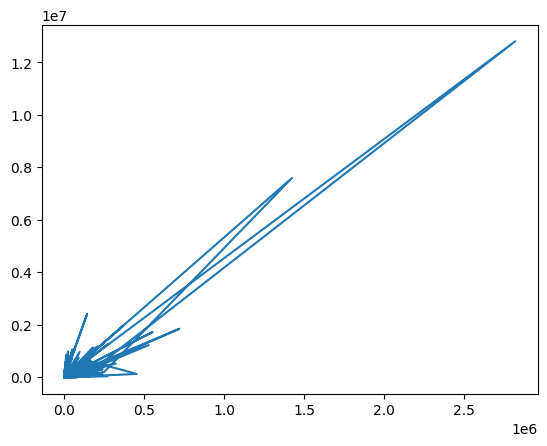

In [42]:

plt.plot(df['Main Workers - Total - Females'],df['Main Workers - Total - Males'])
plt.show()

<Axes: xlabel='Group', ylabel='Count'>

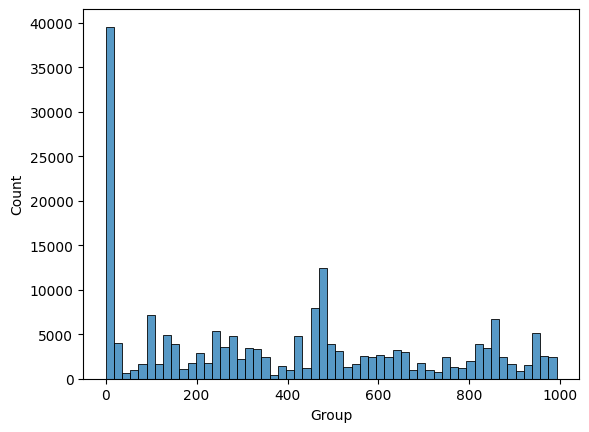

In [ ]:

sns.histplot(x='Group', data=df)
# plt.show()

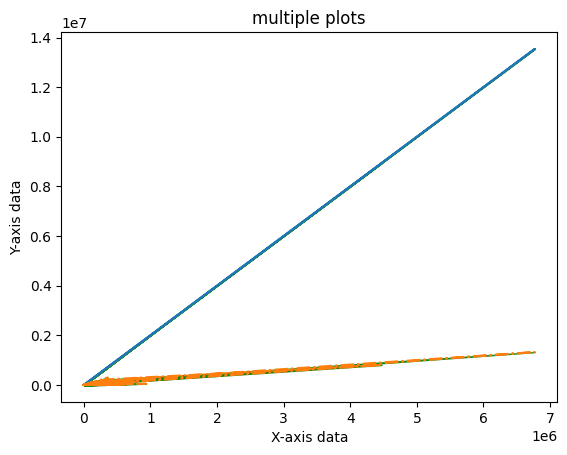

In [44]:
x = np.array(list(df['Main Workers - Rural -  Persons']))
y = x*2
 
plt.plot(x, y)
 
x1 = list(df['Main Workers - Rural - Males'])
y1 = list(df['Main Workers - Rural - Females']) 
plt.plot(x, y1, '-.')
plt.xlabel("X-axis data")
plt.ylabel("Y-axis data")
plt.title('multiple plots')
 
plt.fill_between(x, y, y1, color='green', alpha=0.9)
plt.show()

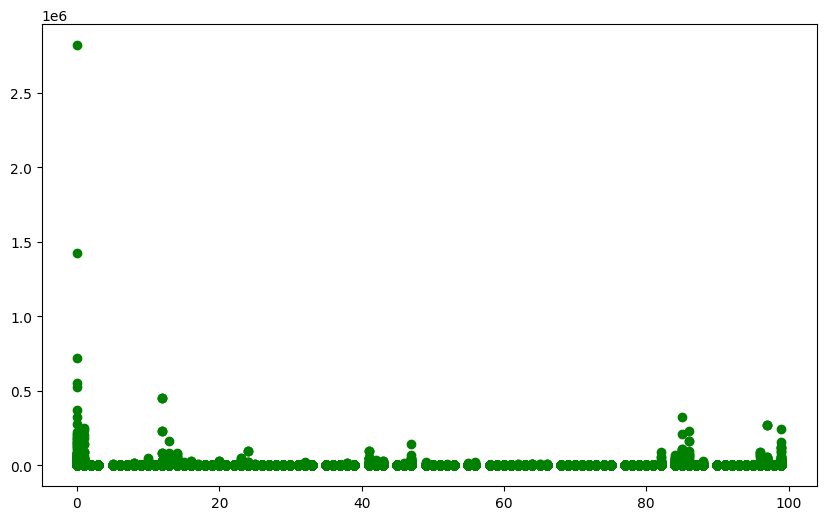

In [ ]:
plt.figure(figsize=(10, 6))
x =list(df['Division'])
 
y =list(df['Main Workers - Total - Females'])
 
plt.scatter(x, y, c ="green")
 
# To show the plot
plt.show()

In [ ]:
df['Main Workers - Total - Males']=df['Main Workers - Total - Males'].astype(float)
x = list(df['Main Workers - Total - Males'])
x.sort()
x = x[:5000]  
print(x)
df['Main Workers - Total - Females']=df['Main Workers - Total - Females'].astype(float)
y = list(df['Main Workers - Total - Females'])
y.sort()
y = y[:5000]  
print(y)
df['Main Workers - Total -  Persons']=df['Main Workers - Total -  Persons'].astype(float)
z = list(df['Main Workers - Total -  Persons'])
z.sort()
z = z[:5000]  
print(z)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

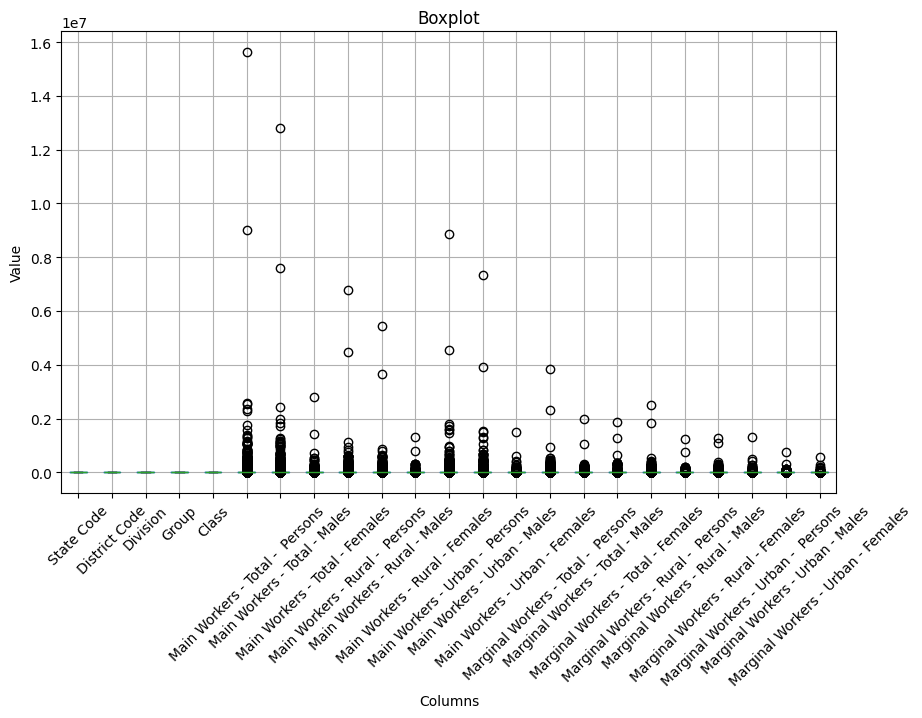

In [ ]:
plt.figure(figsize=(10, 6))
df.boxplot()
plt.title('Boxplot')
plt.xlabel('Columns')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

In [48]:
# df = np.random.randint(low=10, high=100,
#                          size=2000).reshape(1000, 2) 
df = pd.DataFrame(df, columns=('Division','Group'))
X = df[['Division','Group']]
y = np.random.rand(1000)
train_data_x, test_data_x, train_data_y, test_data_y = \
    train_test_split(df, y, test_size=0.25)

In [49]:
scaler = MinMaxScaler()
train_data_x_scaled = scaler.fit_transform(train_data_x.to_numpy())
test_data_x = scaler.transform(test_data_x.to_numpy())

C:\Users\DineshMohan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\_array_api.py:472: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
C:\Users\DineshMohan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\_array_api.py:489: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


In [50]:

reg = DecisionTreeRegressor(min_samples_split=4,
                            max_leaf_nodes=10)
reg.fit(train_data_x_scaled,train_data_y)
y_pred = reg.predict(test_data_x)

In [51]:

print(mean_squared_error(y_pred,test_data_y))

0.09099686116531248


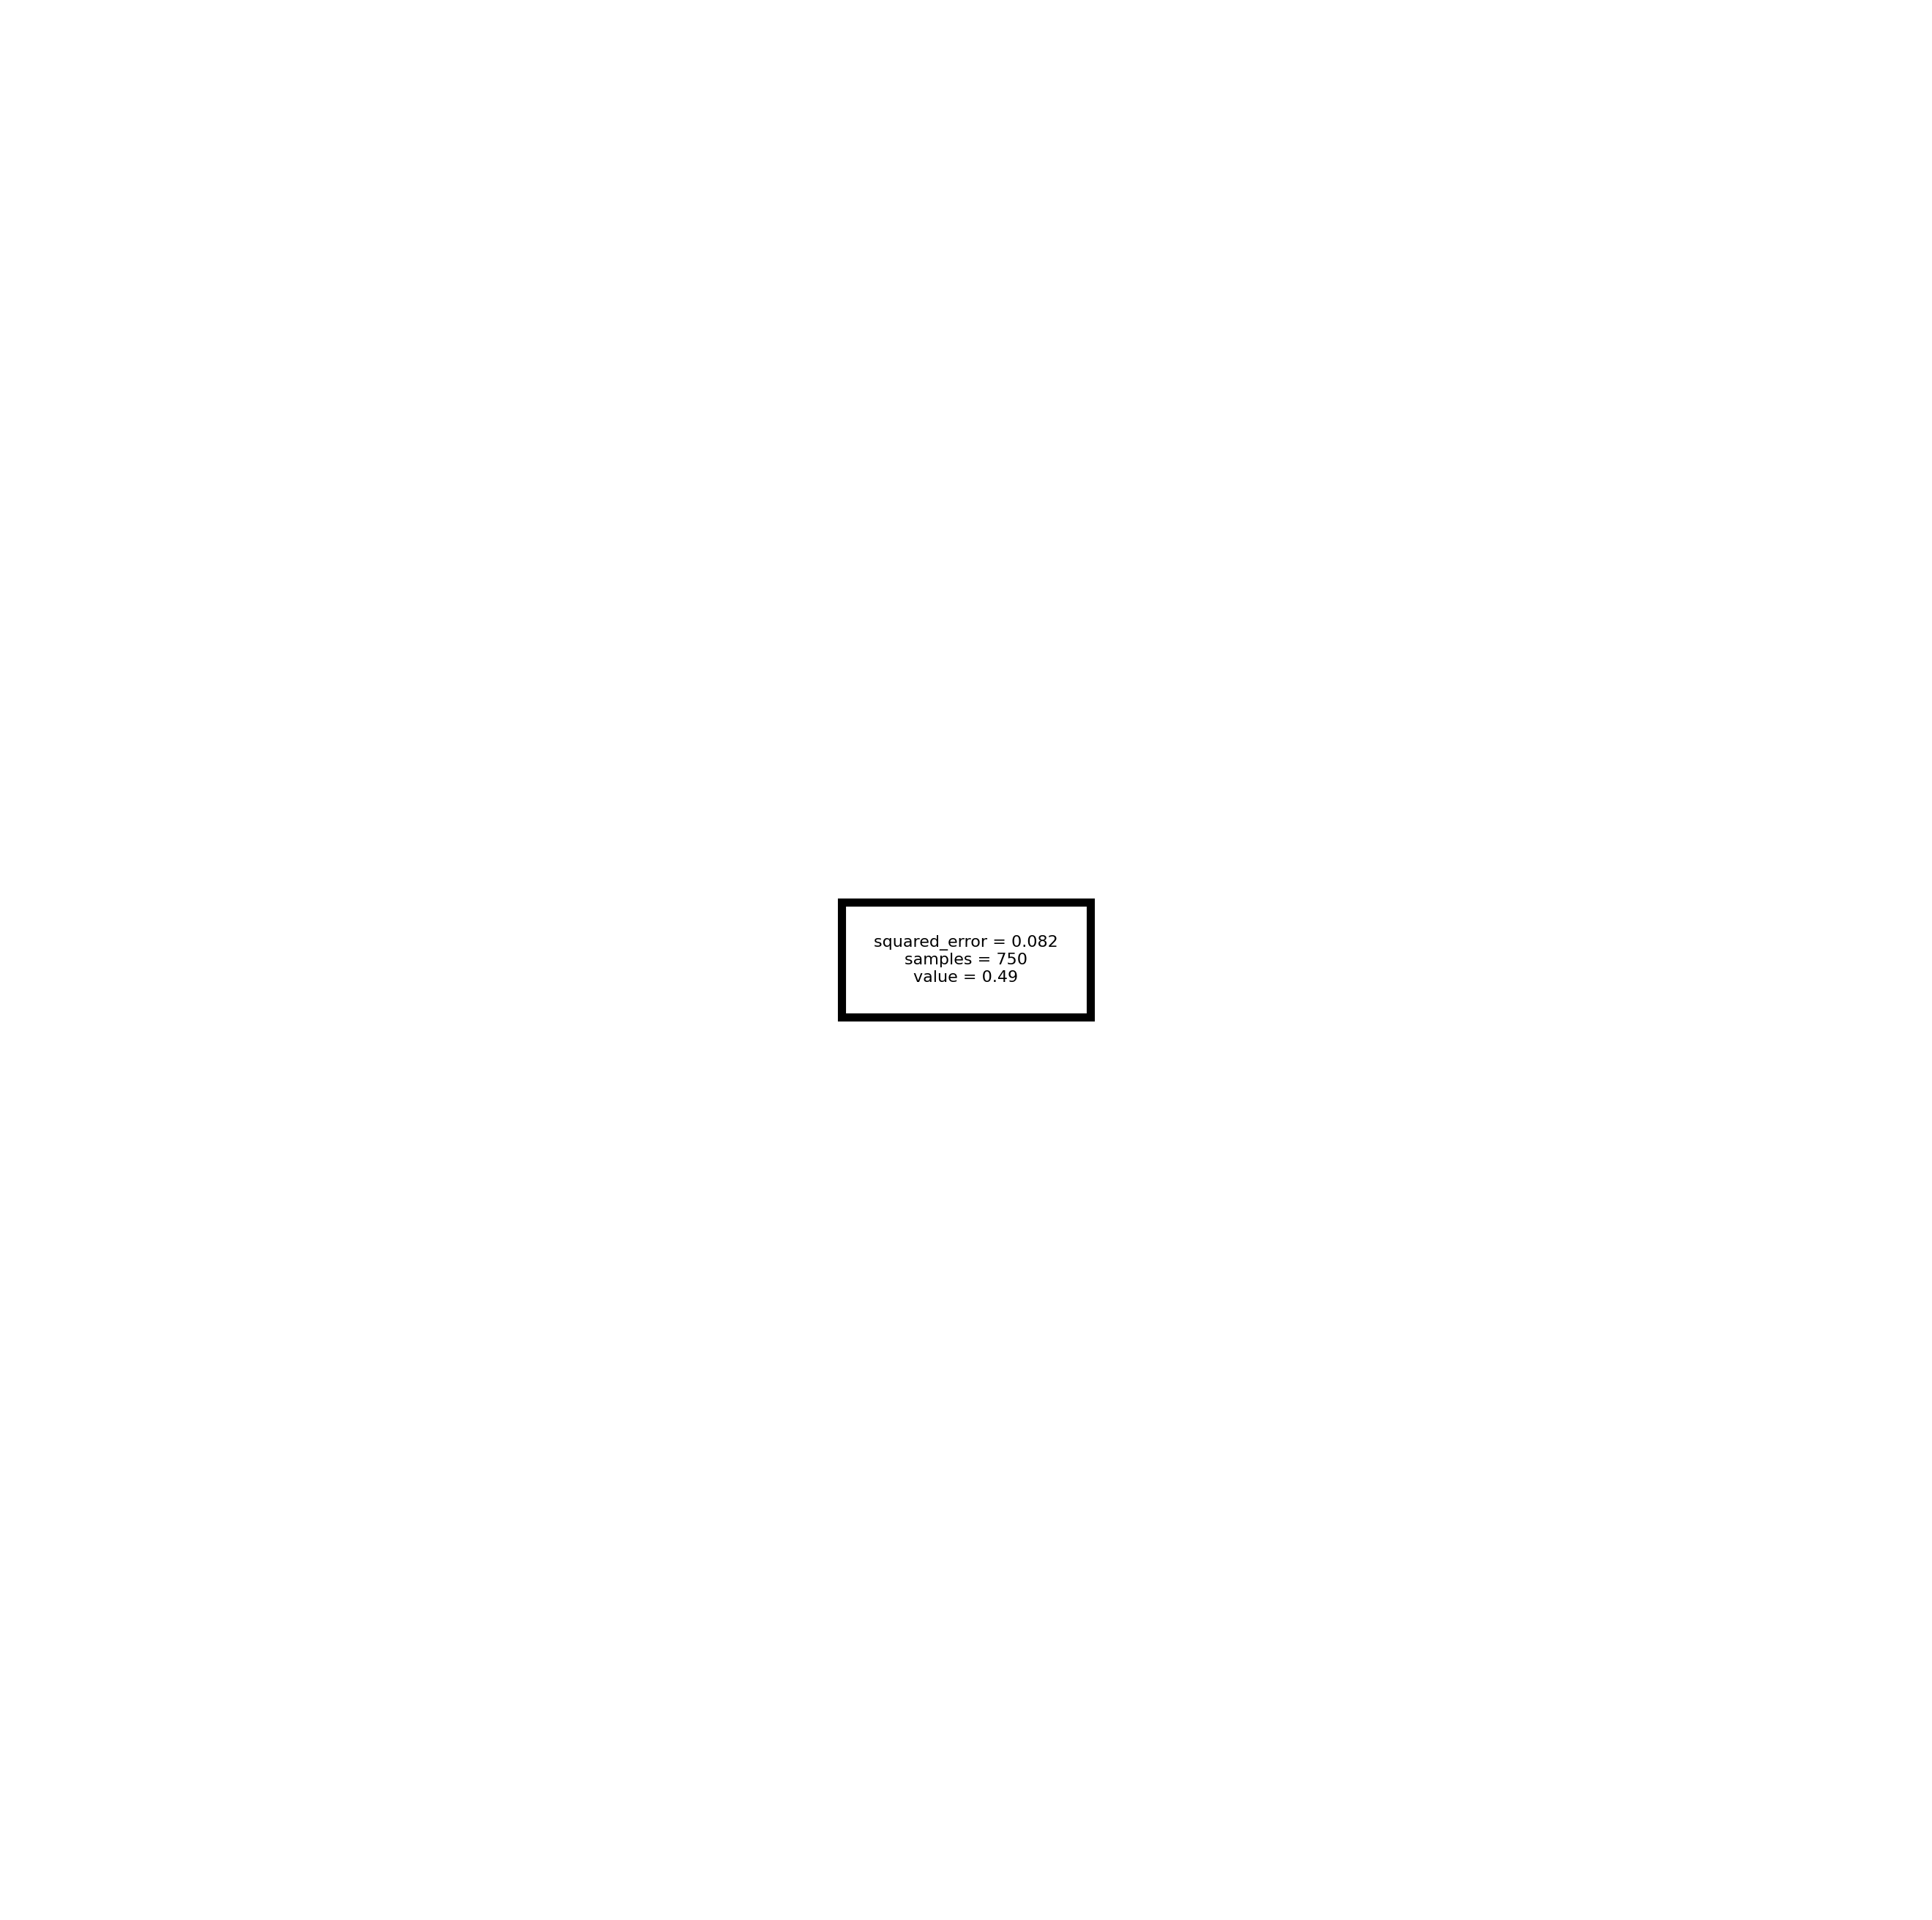

In [52]:

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(4,4), dpi=800)
plot_tree(reg, filled=True, ax=axes, fontsize=2)
plt.show()

In [ ]:
# Tokenize the text in the 'Text' column
df['Tokenized_Text'] = df['NIC Name'].apply(word_tokenize)

# Create a frequency distribution of words in the tokenized text
def get_frequency_distribution(tokens):
    freq_dist = FreqDist(tokens)
    return freq_dist

df['Frequency_Distribution'] = df['Tokenized_Text'].apply(get_frequency_distribution)

# Print the DataFrame
print(df)

        State Code  District Code               India/States  Division  Group  \
0                7              0        STATE  NCT OF DELHI         0      0   
1                7              0        STATE  NCT OF DELHI         1      0   
2                7              0        STATE  NCT OF DELHI         1     11   
3                7              0        STATE  NCT OF DELHI         1     11   
4                7              0        STATE  NCT OF DELHI         1     11   
...            ...            ...                        ...       ...    ...   
195140          19            345  District  Purba Medinipur        99    990   
195141          19            345  District  Purba Medinipur        99    991   
195142          19            345  District  Purba Medinipur        99    991   
195143          19            345  District  Purba Medinipur        99    992   
195144          19            345  District  Purba Medinipur        99    992   

        Class              